Install the libraries 

In [42]:
!pip install pyLDAvis

In [43]:
!pip install vaderSentiment

Import libraries

In [60]:
! pip install spacy

# python -m spacy download en_core_web_sm

In [84]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0 MB 183 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019124 sha256=02ef28e197936ff0aea8a97420e32972a87325226b825956f5eeb31e8ef4e680
  Stored in directory: /Users/darynabilodid/Library/Caches/pip/wheels/fc/31/e9/092e6f05b2817c9cb45804a3d1bf2b9bf6575742c01819337c
Successfully built en-core-web-sm
Note: you may need to restart the kernel to use updated packages.


In [86]:
import en_core_web_sm

nlp = en_core_web_sm.load()
# spacy.load('/en_core_web_sm')

In [2]:
import os
import platform
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [39]:
#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [47]:
from spacy.lang.en import English

Load the dataset

In [24]:
PKL_PATH = 'data/pkl'
df = pd.read_pickle(os.path.join(PKL_PATH, "final_subset_flaired.pkl"))
df['date'] = pd.DatetimeIndex(df['date'])
df.head(3)

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,...,position,stateName,parties,NLTK score,neg,neu,pos,compound,textblob_score,flair_score
0,1356,2015-12-11-098688,the bill that republicans tried to place in th...,dianne feinstein,['Q230733'],2015-12-11 19:13:13,5.0,"[['Dianne Feinstein', '0.6281'], ['None', '0.3...",['http://thehill.com/policy/energy-environment...,E,...,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.000,0.000,-0.999731
1,1358,2015-03-08-035713,"she is the leading candidate, whether it be re...",dianne feinstein,['Q230733'],2015-03-08 08:00:00,5.0,"[['Dianne Feinstein', '0.5292'], ['None', '0.3...",['http://www.mcclatchydc.com/2015/03/08/259048...,E,...,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.000,0.125,0.880999
2,1361,2015-10-21-040792,i hope that once secretary clinton has testifi...,dianne feinstein,['Q230733'],2015-10-21 20:07:39,1.0,"[['Dianne Feinstein', '0.7956'], ['None', '0.1...",['http://www.mcclatchydc.com/news/nation-world...,E,...,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.0,0.745,0.255,0.802,0.000,0.886639


In [177]:
df

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,...,position,stateName,parties,NLTK score,neg,neu,pos,compound,textblob_score,flair_score
0,1356,2015-12-11-098688,the bill that republicans tried to place in th...,dianne feinstein,['Q230733'],2015-12-11 19:13:13,5.0,"[['Dianne Feinstein', '0.6281'], ['None', '0.3...",['http://thehill.com/policy/energy-environment...,E,...,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.000000,-0.999731
1,1358,2015-03-08-035713,"she is the leading candidate, whether it be re...",dianne feinstein,['Q230733'],2015-03-08 08:00:00,5.0,"[['Dianne Feinstein', '0.5292'], ['None', '0.3...",['http://www.mcclatchydc.com/2015/03/08/259048...,E,...,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.125000,0.880999
2,1361,2015-10-21-040792,i hope that once secretary clinton has testifi...,dianne feinstein,['Q230733'],2015-10-21 20:07:39,1.0,"[['Dianne Feinstein', '0.7956'], ['None', '0.1...",['http://www.mcclatchydc.com/news/nation-world...,E,...,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.000,0.745,0.255,0.8020,0.000000,0.886639
3,1414,2015-03-09-004766,appalled at the latest step of 47 republicans ...,dianne feinstein,['Q230733'],2015-03-09 20:43:42,2.0,"[['Dianne Feinstein', '0.8821'], ['None', '0.0...",['http://dispatch.com/content/blogs/the-daily-...,E,...,Senator,CA,Democrat,"{'neg': 0.09, 'neu': 0.813, 'pos': 0.096, 'com...",0.090,0.813,0.096,0.0516,0.003125,-0.998594
4,1573,2015-05-19-045108,sen. rand paul on the criticism of his interac...,dianne feinstein,['Q230733'],2015-05-19 11:00:40,1.0,"[['Dianne Feinstein', '0.8207'], ['None', '0.1...",['http://rss.cnn.com/~r/rss/cnn_allpolitics/~3...,E,...,Senator,CA,Democrat,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp...",0.139,0.861,0.000,-0.4404,0.000000,-0.958089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,168215,2020-03-01-017323,"in 2018, the democrats drew an inside straight...",david valadao,['Q3528567'],2020-03-01 21:42:23,1.0,"[['David Valadao', '0.6336'], ['None', '0.3664']]",['http://www.sfchronicle.com/politics/article/...,E,...,Representative,CA,Republican,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.000,0.888,0.112,0.2263,0.200000,-0.995820
6358,168321,2020-01-22-000487,[ w ] hen jesus was falsely accused of treason...,barry loudermilk,['Q16731643'],2020-01-22 11:00:52,1.0,"[['Barry Loudermilk', '0.5281'], ['None', '0.3...",['https://baptistnews.com/article/trumps-impea...,E,...,Representative,GA,Republican,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",0.091,0.909,0.000,-0.2960,0.050000,-0.934308
6359,168526,2020-01-23-023259,has fought liberal democrats every step of the...,lou barletta,['Q25568'],2020-01-23 17:43:00,1.0,"[['Lou Barletta', '0.4793'], ['None', '0.4523'...",['https://www.timesleader.com/news/770451/bogn...,E,...,Representative,PA,Republican,"{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'comp...",0.223,0.777,0.000,-0.3182,0.000000,0.833893
6360,168614,2020-02-27-026261,i haven't fully assessed [ bernie's candidacy ...,john faso,['Q5856885'],2020-02-27 16:37:00,2.0,"[['John Faso', '0.8997'], ['None', '0.0855'], ...",['https://www.businessinsider.in/politics/news...,E,...,Representative,NY,Republican,"{'neg': 0.063, 'neu': 0.937, 'pos': 0.0, 'comp...",0.063,0.937,0.000,-0.3291,-0.137500,-0.986916


Subset by parties

In [20]:
dem = df[df["parties"] == "Democrat"]
rep = df[df["parties"] == "Republican"]

In [182]:
dem_2015 = dem[(dem['date']> "2015-01-01") & (dem['date']< "2015-12-31")]
dem_2015['quotation']

0       the bill that republicans tried to place in th...
1       she is the leading candidate, whether it be re...
2       i hope that once secretary clinton has testifi...
3       appalled at the latest step of 47 republicans ...
4       sen. rand paul on the criticism of his interac...
                              ...                        
5334    dan innis must join nhgop chair jennifer horn ...
5335    carol shea porter has always fought tirelessly...
5336    carol shea-porter is lying about frank guinta'...
5337    i have long viewed them as a wholly owned subs...
5338    the department of justice and our courts have ...
Name: quotation, Length: 5336, dtype: object

In [113]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

In [183]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

processed_docs = []
for doc in nlp.pipe(dem_2015['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs = processed_docs
del processed_docs

In [184]:
docs

[['bill',
  'republicans',
  'try',
  'place',
  'omnibus',
  'week',
  'knowledge',
  'review',
  'sen',
  'boxer',
  'state',
  'white',
  'house',
  'last week',
  'the white house'],
 ['lead',
  'candidate',
  'republican',
  'democrat',
  'president',
  'think',
  'need',
  'step',
  'come',
  'state',
  'exactly',
  'situation'],
 ['hope',
  'secretary',
  'clinton',
  'testify',
  'house',
  'republicans',
  'finally',
  'turn',
  'attention',
  'implement',
  'exist',
  'recommendation',
  'support',
  'fund',
  'need',
  'protect',
  'diplomat'],
 ['appal',
  'late',
  'step',
  'republicans',
  'blow',
  'major',
  'effort',
  'country',
  'world',
  'power',
  'negotiate',
  'peaceful',
  'resolution',
  'iranian',
  'nuclear',
  'program'],
 ['sen',
  'rand',
  'paul',
  'criticism',
  'interaction',
  'female',
  'interviewer',
  'female',
  'opponent',
  'rand paul'],
 ['brazen',
  'attempt',
  'senate',
  'republicans',
  'sabotage',
  'negotiation',
  'aim',
  'prevent'

In [201]:
# Add bigrams too
from gensim.models.phrases import Phrases

# Add bigrams to docs (only ones that appear 15 times or more).
bigram = Phrases(docs, min_count=15)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [202]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 2408
Number of chunks: 5336


In [187]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(8, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(1, 1),
  (5, 1),
  (19, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(5, 1),
  (23, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(7, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(5, 1),
  (47, 1),
  (50, 1),
  (51, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(8, 1),


In [395]:
# models
from gensim.models import LdaMulticore
params = {'passes': 10, 'random_state': 1}
base_models = dict()
model = LdaMulticore(corpus=corpus, num_topics=5, id2word=dictionary, workers=6,
                passes=params['passes'], random_state=params['random_state'])

Process SpawnPoolWorker-76:
Traceback (most recent call last):
  File "/Users/darynabilodid/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/darynabilodid/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/darynabilodid/opt/anaconda3/lib/python3.8/multiprocessing/pool.py", line 109, in worker
    initializer(*initargs)
  File "/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/gensim/models/ldamulticore.py", line 337, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/gensim/models/ldamodel.py", line 742, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/gensim/models/ldamodel.py", line 680, in inference
    expElogbetad = self.expElogbeta[:, i

KeyboardInterrupt: 

In [ ]:
model.show_topics(num_words=5)

In [199]:
model[corpus[0]]

[(0, 0.57516193),
 (1, 0.38364515),
 (2, 0.013669043),
 (3, 0.01377347),
 (4, 0.013750451)]

In [192]:
sorted(model[corpus[0]],key=lambda x:x[1],reverse=True)

[(9, 0.93998796)]

In [194]:
# plot topics
data =  pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [203]:
from gensim import corpora, models

5336

In [ ]:
dictionary_LDA = corpora.Dictionary(docs)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in docs]

num_topics = 5
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

In [391]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.039*"american_people" + 0.033*"republicans" + 0.023*"health_care" + 0.022*"republican" + 0.021*"president_obama" + 0.020*"hillary_clinton" + 0.018*"presidential_candidate" + 0.014*"secretary_clinton" + 0.013*"affordable_care" + 0.010*"people"

1: 0.048*"republicans" + 0.021*"paul_ryan" + 0.021*"woman_health" + 0.018*"shut_government" + 0.017*"department_homeland" + 0.017*"republican" + 0.014*"democrats" + 0.013*"social_security" + 0.012*"president_united" + 0.012*"common_sense"

2: 0.041*"planned_parenthood" + 0.039*"marco_rubio" + 0.032*"rand_paul" + 0.032*"homeland_security" + 0.030*"select_committee" + 0.018*"republicans" + 0.017*"government_shutdown" + 0.016*"health_insurance" + 0.016*"republican" + 0.015*"barack_obama"

3: 0.041*"republican_party" + 0.034*"republican" + 0.022*"republican_colleague" + 0.022*"republicans" + 0.014*"middle_class" + 0.014*"party" + 0.009*"work" + 0.009*"democrats" + 0.008*"house" + 0.008*"national_security"

4: 0.092*"donald_trump" + 0.033*"united

In [392]:
lda_model[corpus[3]]

[(2, 0.2627466), (3, 0.735383)]

In [393]:
dem_2015['quotation'].iloc[3]

'appalled at the latest step of 47 republicans to blow up a major effort by our country and the world powers to negotiate a peaceful resolution to the iranian nuclear program.'

In [394]:
%matplotlib inline
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [378]:
dem_2015

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,...,parties,NLTK score,neg,neu,pos,compound,textblob_score,flair_score,max_topic,just_date
0,1356.0,2015-12-11-098688,the bill that republicans tried to place in th...,dianne feinstein,['Q230733'],2015-12-11 19:13:13,5.0,"[['Dianne Feinstein', '0.6281'], ['None', '0.3...",['http://thehill.com/policy/energy-environment...,E,...,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.000000,-0.999731,10.0,2015-12-11
1,1358.0,2015-03-08-035713,"she is the leading candidate, whether it be re...",dianne feinstein,['Q230733'],2015-03-08 08:00:00,5.0,"[['Dianne Feinstein', '0.5292'], ['None', '0.3...",['http://www.mcclatchydc.com/2015/03/08/259048...,E,...,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0.125000,0.880999,4.0,2015-03-08
2,1361.0,2015-10-21-040792,i hope that once secretary clinton has testifi...,dianne feinstein,['Q230733'],2015-10-21 20:07:39,1.0,"[['Dianne Feinstein', '0.7956'], ['None', '0.1...",['http://www.mcclatchydc.com/news/nation-world...,E,...,Democrat,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.000,0.745,0.255,0.8020,0.000000,0.886639,12.0,2015-10-21
3,1414.0,2015-03-09-004766,appalled at the latest step of 47 republicans ...,dianne feinstein,['Q230733'],2015-03-09 20:43:42,2.0,"[['Dianne Feinstein', '0.8821'], ['None', '0.0...",['http://dispatch.com/content/blogs/the-daily-...,E,...,Democrat,"{'neg': 0.09, 'neu': 0.813, 'pos': 0.096, 'com...",0.090,0.813,0.096,0.0516,0.003125,-0.998594,16.0,2015-03-09
4,1573.0,2015-05-19-045108,sen. rand paul on the criticism of his interac...,dianne feinstein,['Q230733'],2015-05-19 11:00:40,1.0,"[['Dianne Feinstein', '0.8207'], ['None', '0.1...",['http://rss.cnn.com/~r/rss/cnn_allpolitics/~3...,E,...,Democrat,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp...",0.139,0.861,0.000,-0.4404,0.000000,-0.958089,1.0,2015-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,473863.0,2015-12-08-016928,dan innis must join nhgop chair jennifer horn ...,carol shea-porter,['Q434112'],2015-12-08 18:31:09,1.0,"[['Carol Shea-Porter', '0.732'], ['None', '0.1...",['http://www.necn.com/news/politics/Democratic...,E,...,Democrat,"{'neg': 0.283, 'neu': 0.606, 'pos': 0.111, 'co...",0.283,0.606,0.111,-0.5267,0.000000,-0.855591,15.0,2015-12-08
5335,473864.0,2015-08-10-012824,carol shea porter has always fought tirelessly...,carol shea-porter,['Q434112'],2015-08-10 15:57:20,7.0,"[['Carol Shea-Porter', '0.5054'], ['None', '0....",['http://atr.rollcall.com/carol-shea-porter-fi...,E,...,Democrat,"{'neg': 0.138, 'neu': 0.813, 'pos': 0.049, 'co...",0.138,0.813,0.049,-0.5574,0.112121,0.983853,16.0,2015-08-10
5336,473868.0,2015-05-16-005958,carol shea-porter is lying about frank guinta'...,carol shea-porter,['Q434112'],2015-05-16 22:12:39,1.0,"[['Carol Shea-Porter', '0.4344'], ['Frank Guin...",['http://thehill.com/blogs/ballot-box/fundrais...,E,...,Democrat,"{'neg': 0.143, 'neu': 0.798, 'pos': 0.059, 'co...",0.143,0.798,0.059,-0.4588,0.350000,-0.939270,NaN,2015-05-16
5337,473994.0,2015-03-30-024781,i have long viewed them as a wholly owned subs...,earl pomeroy,['Q1277145'],2015-03-30 09:00:00,1.0,"[['Earl Pomeroy', '0.8086'], ['None', '0.1855'...",['http://www.publicintegrity.org/2015/03/30/17...,E,...,Democrat,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.000,0.803,0.197,0.4019,-0.050000,-0.776383,NaN,2015-03-30


In [377]:
topics = [lda_model[corpus[i]] for i in range(len(dem_2015))]

IndexError: list index out of range

In [262]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [263]:
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [278]:
document_topic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.484035,0.000000,0.507474,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.984426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187097,0.805141,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080295,0.000000,0.0,0.000000,0.000000,0.908592,0.000000,0.0,0.000000
4,0.000000,0.987499,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.092936,0.000000,0.000000,0.768757,0.128421,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5332,0.395426,0.000000,0.0,0.000000,0.065584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.082028,0.000000,0.362217,0.086018,0.0,0.000000
5333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260078,0.0,0.327105,0.000000,0.000000,0.392084,0.0,0.000000
5334,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.983035,0.000000,0.000000,0.0,0.000000


In [353]:
document_topic['max_topic'] = document_topic.apply(lambda x: x.argmax(), axis=1)

In [272]:
print(dem_2015['quotation'].loc[707])


they don't mind having big government to interfere with a woman's right to choose and to try to take down planned parenthood. they're fine with big government when it comes to that. i'm sick of it. you know, we can do these things. we should not be paralyzed by the republicans and their constant refrain, `big government this, big government that,' except for what they want to impose on the american people. i know we can afford it, because we're going to make the wealthy pay for it. that is the way to get it done.


<AxesSubplot:>

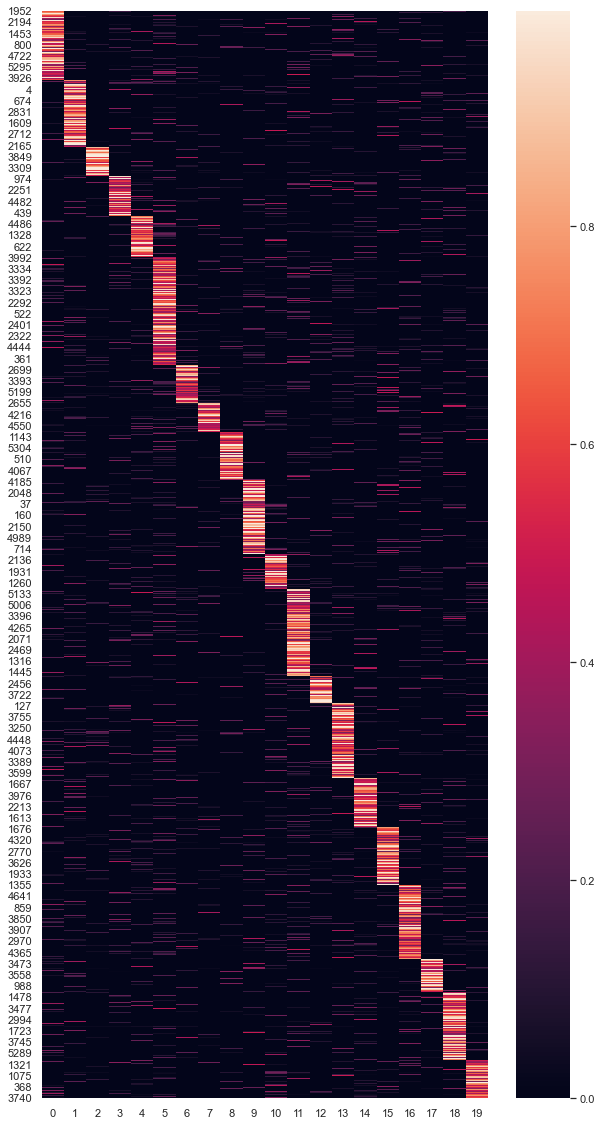

In [273]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

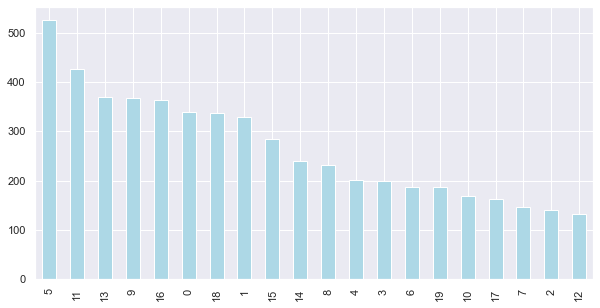

In [274]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [283]:
document_topic[['max_topic']]

,max_topic
0,10
1,4
2,12
3,16
4,1
...,...
5331,9
5332,0
5333,17
5334,15


In [293]:
dem_2015 = pd.concat([dem_2015, document_topic[['max_topic']]], axis=1,)

In [358]:
dem_2105.head(4)

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,...,parties,NLTK score,neg,neu,pos,compound,textblob_score,flair_score,max_topic,just_date
0,1356.0,2015-12-11-098688,the bill that republicans tried to place in th...,dianne feinstein,['Q230733'],2015-12-11 19:13:13,5.0,"[['Dianne Feinstein', '0.6281'], ['None', '0.3...",['http://thehill.com/policy/energy-environment...,E,...,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000,0.000000,-0.999731,10.0,2015-12-11
1,1358.0,2015-03-08-035713,"she is the leading candidate, whether it be re...",dianne feinstein,['Q230733'],2015-03-08 08:00:00,5.0,"[['Dianne Feinstein', '0.5292'], ['None', '0.3...",['http://www.mcclatchydc.com/2015/03/08/259048...,E,...,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,1.000,0.000,0.0000,0.125000,0.880999,4.0,2015-03-08
2,1361.0,2015-10-21-040792,i hope that once secretary clinton has testifi...,dianne feinstein,['Q230733'],2015-10-21 20:07:39,1.0,"[['Dianne Feinstein', '0.7956'], ['None', '0.1...",['http://www.mcclatchydc.com/news/nation-world...,E,...,Democrat,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.00,0.745,0.255,0.8020,0.000000,0.886639,12.0,2015-10-21
3,1414.0,2015-03-09-004766,appalled at the latest step of 47 republicans ...,dianne feinstein,['Q230733'],2015-03-09 20:43:42,2.0,"[['Dianne Feinstein', '0.8821'], ['None', '0.0...",['http://dispatch.com/content/blogs/the-daily-...,E,...,Democrat,"{'neg': 0.09, 'neu': 0.813, 'pos': 0.096, 'com...",0.09,0.813,0.096,0.0516,0.003125,-0.998594,16.0,2015-03-09


In [359]:
dem_2105[dem_2105["max_topic"] == 1]

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,...,parties,NLTK score,neg,neu,pos,compound,textblob_score,flair_score,max_topic,just_date


In [307]:
dem_2105[dem_2105["max_topic"] == 2]['flair_score'].mean()

-0.3071522329534803

In [308]:
dem_2105[dem_2105["max_topic"] == 3]['flair_score'].mean()

-0.3192065219686489

In [309]:
dem_2105[dem_2105["max_topic"] == 4]['flair_score'].mean()

-0.327737590863337

In [310]:
dem_2105[dem_2105["max_topic"] == 5]['flair_score'].mean()

-0.4130058313551403

In [312]:
dem_2105[dem_2105["max_topic"] == 6]['flair_score'].mean()

-0.35141768143138785

In [313]:
dem_2105[dem_2105["max_topic"] == 7]['flair_score'].mean()

-0.3671510978920819

In [314]:
dem_2105[dem_2105["max_topic"] == 8]['flair_score'].mean()

-0.43023465386716836

In [311]:
dem_2105['flair_score'].mean()

-0.38880683021477497

In [315]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [321]:
dem_2015['just_date'] = dem_2015['date'].dt.date
# dem_2015

In [326]:
dem_2105['just_date'] = dem_2105['date'].dt.date
dem_2105['just_date'] = pd.DatetimeIndex(dem_2105['just_date'])

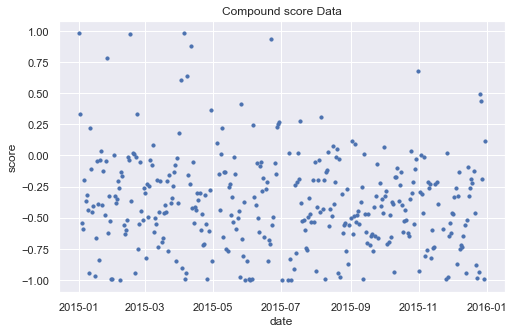

In [333]:
# Plot the average for each day
by_date = dem_2105.groupby(["just_date"])["flair_score"].mean()
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(by_date.index, by_date, s=10)
ax.set_xlabel('date')
ax.set_ylabel('score')
ax.set_title('Compound score Data')
ax.grid(True)

In [339]:
pd.DataFrame(by_date)

,flair_score
just_date,
2015-01-01,0.981030
2015-01-02,0.333666
2015-01-04,-0.543347
2015-01-05,-0.593988
2015-01-06,-0.195883
...,...
2015-12-26,0.495056
2015-12-27,0.434053
2015-12-28,-0.189361


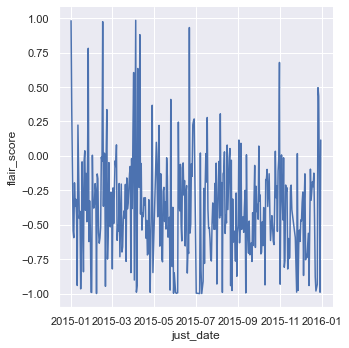

In [340]:
ax.plot(mean_compound_score)
ax.set_title('Compound score averaged over days')
ax.set_xlabel('Date')
ax.set_ylim((-1, 1))

ax = axes[1]
ax.plot(mean_compound_score_pos)
ax.set_title('Pos compound score averaged over days')
ax.set_xlabel('Date')
ax.set_ylim((0, 1))

ax = axes[2]
ax.plot(mean_compound_score_neg)
ax.set_title('Neg compound score averaged over days')
ax.set_xlabel('Date')
ax.set_ylim((-1, 0))r_score', kind='line', ci='sd')

In [342]:
dem_2105['max_topic'] = dem_2105.max_topic.astype(str)

In [ ]:
by_date = dem_2105.groupby(["just_date"])["flair_score"].mean()

In [345]:
grouped_by_topics = dem_2105.groupby(['just_date', 'max_topic']).mean()

In [346]:
grouped_by_topics

Unnamed: 0  numOccurrences  birthYear  deathYear  \
just_date  max_topic                                                     
2015-01-01 9.0          195041.0             7.0     1960.0        NaN   
2015-01-02 13.0         440208.5             1.0     1949.5        NaN   
           4.0          289948.0             1.0     1961.0        NaN   
2015-01-04 1.0          467156.0             1.0     1939.0        NaN   
           13.0         467192.0             1.0     1939.0        NaN   
...                          ...             ...        ...        ...   
2015-12-29 9.0           72584.5             1.0     1947.0        NaN   
2015-12-30 13.0         290554.0             1.0     1961.0        NaN   
           16.0         190896.0             1.0     1939.0        NaN   
           17.0          71991.0             2.0     1947.0        NaN   
           5.0          425762.0             2.0     1962.0        NaN   

                         neg    neu     pos  compound  textblob_score  \
just_date  max_topic                                                    
2015-01-01 9.0        0.0000  1.000  0.0000   0.00000           0.000   
2015-01-02 13.0       0.0000  1.000  0.0000   0.00000           0.475   
           4.0        0.2240  0.776  0.0000  -0.72360          -0.100   
2015-01-04 1.0        0.0920  0.777  0.1310   0.23630           0.000   
           13.0       0.0000  0.863  0.1370   0.40190           0.000   
...                      ...    ...     ...       ...             ...   
2015-12-29 9.0        0.1605  0.670  0.1695  -0.04755           0.025   
2015-12-30 13.0       0.0000  0.455  0.5450   0.71840           0.000   
           16.0       0.0000  0.854  0.1460   0.47670           0.000   
           17.0       0.0000  0.789  0.2110   0.49390           0.000   
           5.0        0.1980  0.684  0.1180  -0.68000          -0.125   

                      flair_score  
just_date  max_topic               
2015-01-01 9.0           0.981030  
2015-01-02 13.0          0.995691  
           4.0          -0.990385  
2015-01-04 1.0          -0.999803  
           13.0         -0.989152  
...                           ...  
2015-12-29 9.0          -0.981124  
2015-12-30 13.0         -0.529386  
           16.0          0.940936  
           17.0          0.999363  
           5.0          -0.952334  

[3021 rows x 10 columns]

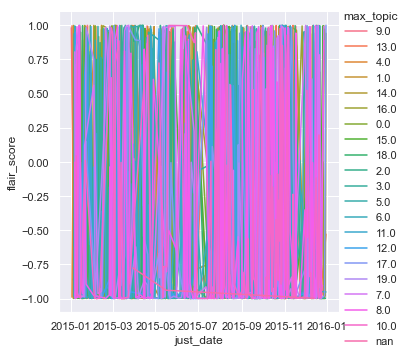

In [347]:
sns.relplot(data=grouped_by_topics, x='just_date', y='flair_score', hue='max_topic', kind='line', ci='sd')

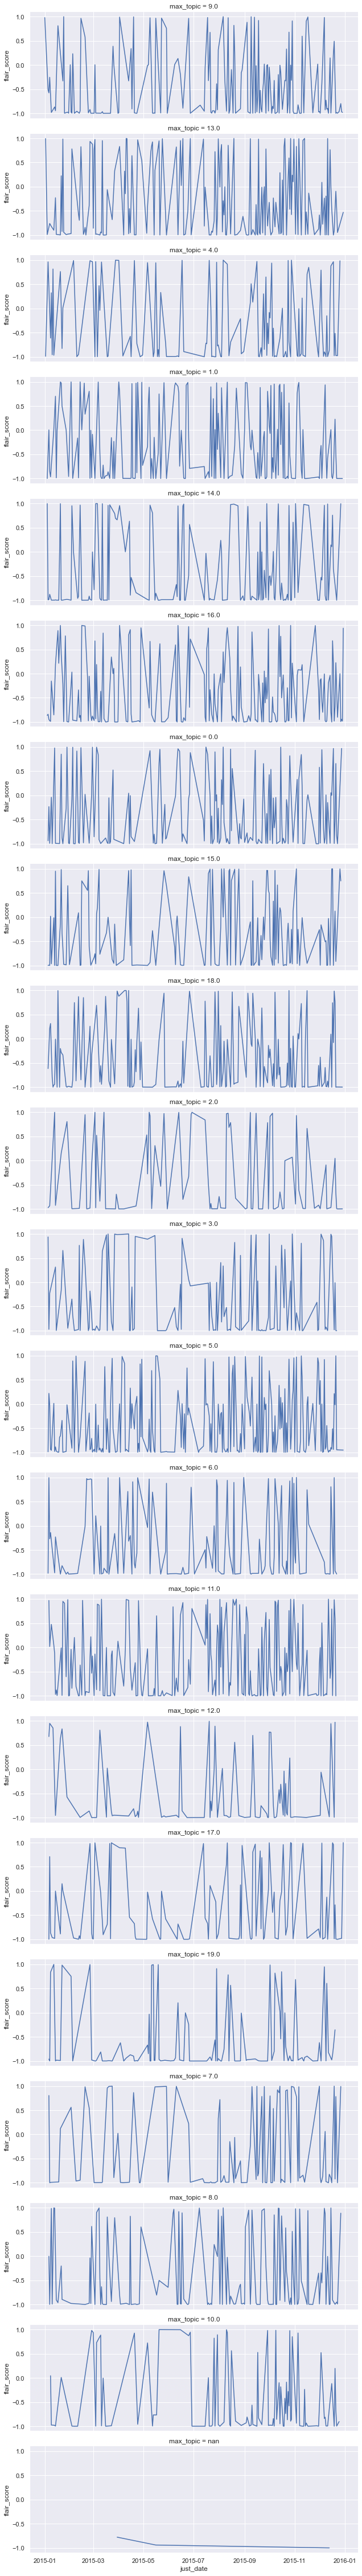

In [352]:
# convert the date column to a datetime dtype
# df.dates = pd.to_datetime(df.dates, format='%Y-%d-%m')

# plot
sns.relplot(data=grouped_by_topics, row='max_topic', x='just_date', y='flair_score', kind='line', height=3, aspect=3)